In [1]:
import numpy as np
from scipy.optimize import fsolve
import plotly.graph_objects as go


def run_task(taskName: str):
	print("Running task %s" %taskName)
	y_star, b1_star, b2_star, c_star, v_1_2, v_1, v_2, x1_star_lim, x2_star_lim, v_delta, sigma_1, sigma_2, b1_sh, b2_sh, n_core, r_1, r_2, x_partial_equilibrium_1, x_partial_equilibrium_2, y_hat, x1_star_eg, x2_star_eg = solve()
	print("coalition game:")
	print("y*: {:0.2f}".format(y_star))
	print("c*: {:0.2f}".format(c_star))
	print("b1*: {:0.2f}, b2*: {:0.2f}".format(b1_star, b2_star))
	print("coalition payoff v_1_2: {:0.2f}".format(v_1_2))
	print("\n")
	print("non-coalition game:")
	print("first gamer payoff v1: {:0.2f}".format(v_1))
	print("second gamer payoff v2: {:0.2f}".format(v_2))
	print("\n")
	print("v_delta - coalition vs non-coalition payoffs:  {:0.2f}".format(v_delta))
	print("\n")
	print("Shapley's vector payoff (V1,V2) [{:0.2f}, {:0.2f}]".format(sigma_1, sigma_2))
	print("Shapley's vector costs (b1,b2) [{:0.2f}, {:0.2f}]".format(b1_sh, b2_sh))
	print("N-Core {:0.2f}, {:0.2f}".format(n_core[0], n_core[1]))
	print("\n")
	print("partial equilibrium game r1,r2 [{:0.2f}, {:0.2f}]".format(r_1, r_2))
	print("partial equilibrium payoff x1,x2 [{:0.2f}, {:0.2f}]".format(x_partial_equilibrium_1, x_partial_equilibrium_2))
	print("\n")
	print("egalitarian game:")
	print("y_hat {:0.2f}".format(y_hat))
	print("egalitarian payoff first gamer {:0.2f}".format(x1_star_eg))
	print("egalitarian payoff second gamer {:0.2f}".format(x2_star_eg))

	fig = go.Figure()

	# Set axes ranges
	fig.update_xaxes(range=[-0.5, x1_star_lim + x2_star_lim + 0.5])
	fig.update_yaxes(range=[-0.5, x1_star_lim + x2_star_lim + 0.5])

	fig.update_layout(
		xaxis = dict(
			dtick = 0.5
		),
		yaxis = dict(
			dtick = 0.5
		)
	)

	fig.add_shape(
			# Line Vertical
			dict(
				type="line",
				x0=x1_star_lim,
				y0=0,
				x1=x1_star_lim,
				y1=x1_star_lim + x2_star_lim,
				line=dict(
					color="RoyalBlue",
					width=1
				)
	))

	fig.add_shape(
			# Line Horizontal
				type="line",
				x0=0,
				y0=x2_star_lim,
				x1=x1_star_lim + x2_star_lim,
				y1=x2_star_lim,
				line=dict(
					color="RoyalBlue",
					width=1,
				),
		)
	fig.add_shape(
			# Line Diagonal
				type="line",
				x0=0,
				y0=b1_sh + b2_sh,
				x1=b1_sh + b2_sh,
				y1=0,
				line=dict(
					color="RoyalBlue",
					width=1,
				)
	)

	# Create scatter trace of text labels
	fig.add_trace(go.Scatter(
		x=[x1_star_lim, 0],
		y=[0, x2_star_lim],
		text=["x1*", "x2*"],
		mode="markers+text",
	))

	fig.add_trace(go.Scatter(
		x=[n_core[0], b1_sh, x_partial_equilibrium_1, x1_star_eg],
		y=[n_core[1], b2_sh, x_partial_equilibrium_2, x2_star_eg],
		text=["N-core",
			  "Shapley's vector",
			  "Partial equilibrium vector",
			  "Egalitarian game"],
		mode="markers+text",
	))


	fig.update_shapes(dict(xref='x', yref='y'))
	fig.show("svg")

def solve():
	n = 2
	y_star_eq = lambda y: db1_dy(y) + db2_dy(y) - C_dy(y)
	y_star = fsolve(y_star_eq, 2)[0]
	b1_star = b1(y_star)
	b2_star = b2(y_star)
	c_star = C(y_star)
	v_1_2 = b1_star + b2_star - c_star

	v1_eq = lambda y: db1_dy(y) - C_dy(y)
	v_1 = np.max([fsolve(v1_eq, 2, factor=0.1)[0], 0])

	v2_eq = lambda y: db2_dy(y) - C_dy(y)
	v_2 = np.max([fsolve(v2_eq, 2, factor=0.1)[0], 0])

	x1_star_lim = b1_star - v_1
	x2_star_lim = b2_star - v_2

	v_delta = v_1_2 - (v_1 + v_2)

	sigma_1 = (v_1 + v_1_2 - v_2) / 2
	sigma_2 = (v_2 + v_1_2 - v_1) / 2

	b1_sh = b1_star - sigma_1
	b2_sh = b2_star - sigma_2

	n_core_2 = np.min([c_star / n, np.min([b1_star, b2_star]) / n])
	n_core = [c_star - n_core_2, n_core_2]

	r_eq_1 = lambda r: db1_dy(y_star) - r*C_dy(y_star)
	r_eq_2 = lambda r: db2_dy(y_star) - r*C_dy(y_star)
	r_1 = fsolve(r_eq_1, 2, factor=0.1)[0]
	r_2 = fsolve(r_eq_2, 2, factor=0.1)[0]

	x_partial_equilibrium_1 = r_1 * c_star
	x_partial_equilibrium_2 = r_2 * c_star

	egalitarian_eq = lambda y_h: b1(y_h) + b2(y_h) - v_1_2
	y_hat = fsolve(egalitarian_eq, 2, factor=0.1)[0]

	x1_star_eg = b1(y_star) - b1(y_hat)
	x2_star_eg = b2(y_star) - b2(y_hat)

	return y_star, b1_star, b2_star, c_star, v_1_2, v_1, v_2, x1_star_lim, x2_star_lim, v_delta, sigma_1, sigma_2, b1_sh, b2_sh, n_core, r_1, r_2, x_partial_equilibrium_1, x_partial_equilibrium_2, y_hat, x1_star_eg, x2_star_eg

Running task Task 1
coalition game:
y*: 2.17
c*: 1.18
b1*: 3.35, b2*: 1.47
coalition payoff v_1_2: 3.65


non-coalition game:
first gamer payoff v1: 1.77
second gamer payoff v2: 1.00


v_delta - coalition vs non-coalition payoffs:  0.88


Shapley's vector payoff (V1,V2) [2.21, 1.44]
Shapley's vector costs (b1,b2) [1.15, 0.03]
N-Core 0.59, 0.59


partial equilibrium game r1,r2 [0.69, 0.31]
partial equilibrium payoff x1,x2 [0.81, 0.37]


egalitarian game:
y_hat 1.26
egalitarian payoff first gamer 0.83
egalitarian payoff second gamer 0.35


/Users/nikkatalnikov/opt/anaconda3/envs/kpi/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.



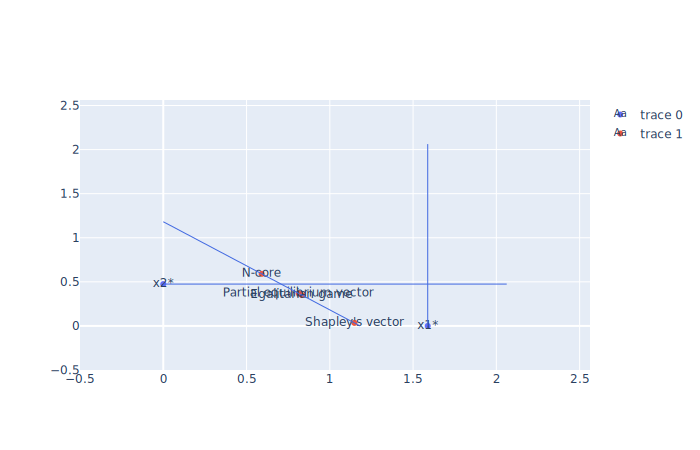

In [2]:
def b1(y: float) -> float:
    return 2*np.log(1 + 2*y)

def b2(y: float) -> float:
    return np.sqrt(y)

def C(y: float) -> float:
    return np.power(y,2) / 4

def db1_dy(y: float) -> float:
    return 4 / (1 + 2*y)

def db2_dy(y: float) -> float:
    return 1 / (2*np.sqrt(y))

def C_dy(y: float) -> float:
    return y / 2

run_task("Task 1")

Running task Task 2
coalition game:
y*: 23.03
c*: 11.51
b1*: 19.20, b2*: 6.36
coalition payoff v_1_2: 14.04


non-coalition game:
first gamer payoff v1: 16.00
second gamer payoff v2: 3.00


v_delta - coalition vs non-coalition payoffs:  -4.96


Shapley's vector payoff (V1,V2) [13.52, 0.52]
Shapley's vector costs (b1,b2) [5.68, 5.84]
N-Core 8.34, 3.18


partial equilibrium game r1,r2 [0.83, 0.17]
partial equilibrium payoff x1,x2 [9.60, 1.92]


egalitarian game:
y_hat 6.32
egalitarian payoff first gamer 9.14
egalitarian payoff second gamer 2.38


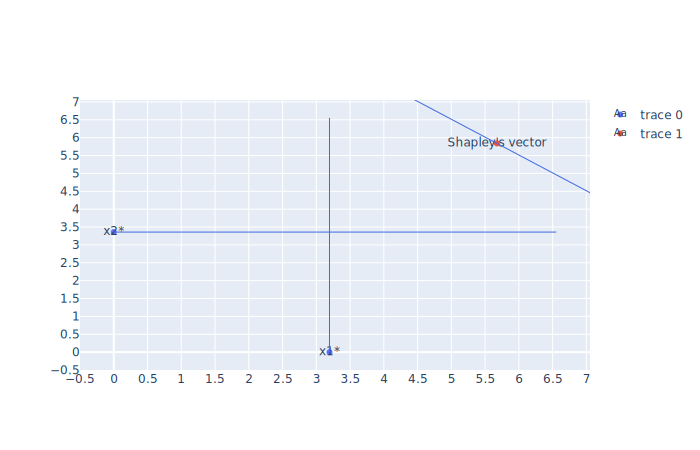

In [3]:
def b1(y: float) -> float:
    return 4 * np.sqrt(y)

def b2(y: float) -> float:
    return 2 * np.log(y + 1)

def C(y: float) -> float:
    return y / 2

def db1_dy(y: float) -> float:
    return 2 / np.sqrt(y)

def db2_dy(y: float) -> float:
    return 2 / (y + 1)

def C_dy(y: float) -> float:
    return 1 / 2

run_task("Task 2")

Running task Task 3
coalition game:
y*: 5.27
c*: 6.96
b1*: 10.55, b2*: 7.35
coalition payoff v_1_2: 10.94


non-coalition game:
first gamer payoff v1: 4.00
second gamer payoff v2: 2.37


v_delta - coalition vs non-coalition payoffs:  4.57


Shapley's vector payoff (V1,V2) [6.28, 4.66]
Shapley's vector costs (b1,b2) [4.27, 2.69]
N-Core 3.48, 3.48


partial equilibrium game r1,r2 [0.76, 0.24]
partial equilibrium payoff x1,x2 [5.27, 1.68]


egalitarian game:
y_hat 2.80
egalitarian payoff first gamer 4.95
egalitarian payoff second gamer 2.01


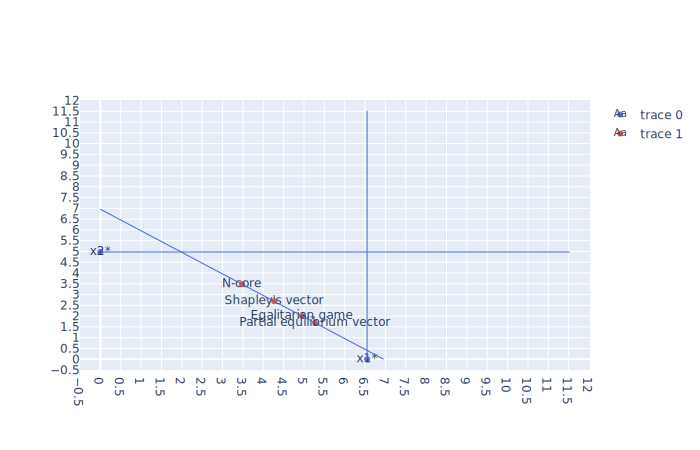

In [4]:
def b1(y: float) -> float:
    return 2 * y

def b2(y: float) -> float:
    return 4 * np.log(1 + y)

def C(y: float) -> float:
    return np.power(y,2) / 4

def db1_dy(y: float) -> float:
    return 2

def db2_dy(y: float) -> float:
    return 4 / (1 + y)

def C_dy(y: float) -> float:
    return y / 2

run_task("Task 3")

Running task Task 4
coalition game:
y*: 3.55
c*: 5.33
b1*: 3.03, b2*: 7.54
coalition payoff v_1_2: 5.24


non-coalition game:
first gamer payoff v1: 0.33
second gamer payoff v2: 1.78


v_delta - coalition vs non-coalition payoffs:  3.13


Shapley's vector payoff (V1,V2) [1.90, 3.34]
Shapley's vector costs (b1,b2) [1.13, 4.20]
N-Core 3.82, 1.52


partial equilibrium game r1,r2 [0.29, 0.71]
partial equilibrium payoff x1,x2 [1.56, 3.77]


egalitarian game:
y_hat 0.95
egalitarian payoff first gamer 1.69
egalitarian payoff second gamer 3.64


/Users/nikkatalnikov/opt/anaconda3/envs/kpi/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.



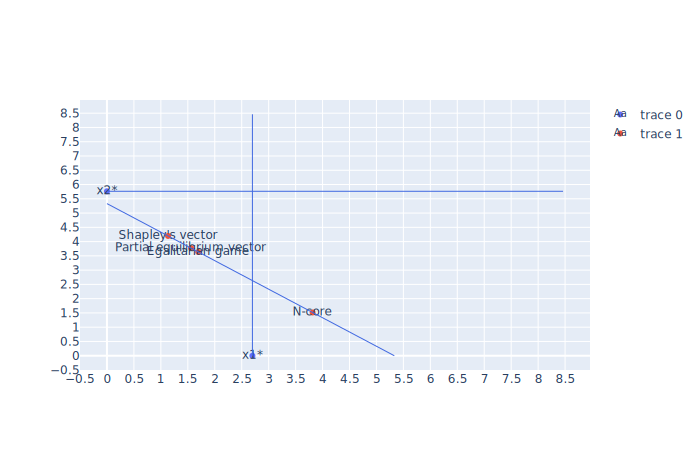

In [5]:
def b1(y: float) -> float:
    return 2 * np.log(y + 1)

def b2(y: float) -> float:
    return 4 * np.sqrt(y)

def C(y: float) -> float:
    return 3 * y / 2

def db1_dy(y: float) -> float:
    return 2 / (y + 1)

def db2_dy(y: float) -> float:
    return 2 / np.sqrt(y)

def C_dy(y: float) -> float:
    return 3/2

run_task("Task 4")

Running task Task 6
coalition game:
y*: 2.38
c*: 2.83
b1*: 4.76, b2*: 2.35
coalition payoff v_1_2: 4.28


non-coalition game:
first gamer payoff v1: 2.00
second gamer payoff v2: 0.88


v_delta - coalition vs non-coalition payoffs:  1.40


Shapley's vector payoff (V1,V2) [2.70, 1.58]
Shapley's vector costs (b1,b2) [2.06, 0.77]
N-Core 1.66, 1.18


partial equilibrium game r1,r2 [0.84, 0.16]
partial equilibrium payoff x1,x2 [2.38, 0.45]


egalitarian game:
y_hat 1.25
egalitarian payoff first gamer 2.27
egalitarian payoff second gamer 0.56


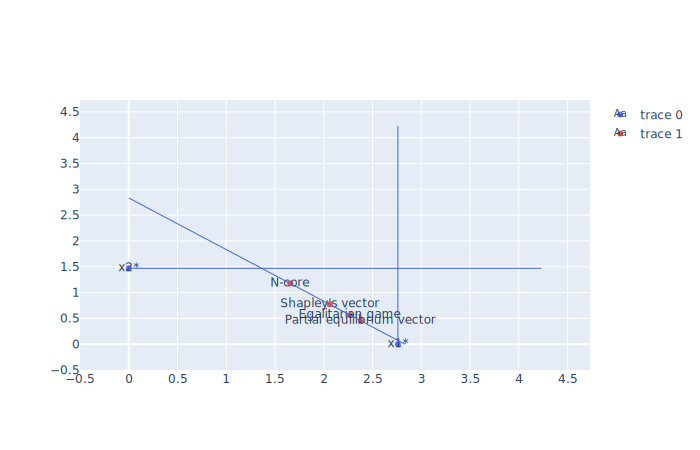

In [6]:
def b1(y: float) -> float:
    return 2 * y

def b2(y: float) -> float:
    return np.log(1 + 4 * y)

def C(y: float) -> float:
    return np.power(y,2) / 2

def db1_dy(y: float) -> float:
    return 2

def db2_dy(y: float) -> float:
    return 4 / (1 + 4 * y)

def C_dy(y: float) -> float:
    return y

run_task("Task 6")



Running task Task 7
coalition game:
y*: 1.00
c*: 1.50
b1*: 0.69, b2*: 2.00
coalition payoff v_1_2: 1.19


non-coalition game:
first gamer payoff v1: 0.00
second gamer payoff v2: 0.44


v_delta - coalition vs non-coalition payoffs:  0.75


Shapley's vector payoff (V1,V2) [0.37, 0.82]
Shapley's vector costs (b1,b2) [0.32, 1.18]
N-Core 1.15, 0.35


partial equilibrium game r1,r2 [0.33, 0.67]
partial equilibrium payoff x1,x2 [0.50, 1.00]


egalitarian game:
y_hat 0.24
egalitarian payoff first gamer 0.48
egalitarian payoff second gamer 1.02


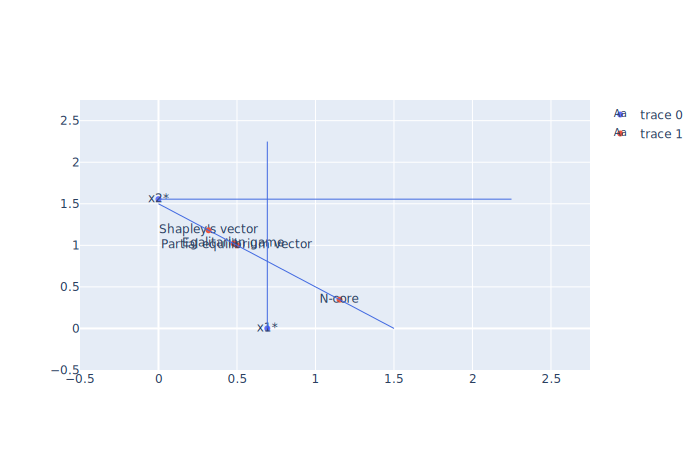

In [7]:
def b1(y: float) -> float:
    return np.log(1 + y)

def b2(y: float) -> float:
    return 2 * np.sqrt(y)

def C(y: float) -> float:
    return y * 3 / 2

def db1_dy(y: float) -> float:
    return 1 / (1 + y)

def db2_dy(y: float) -> float:
    return 1 / np.sqrt(y)

def C_dy(y: float) -> float:
    return 3 / 2

run_task("Task 7")
